In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

data_path = "/content/cpcb_dly_aq_tamil_nadu-2014.csv"
df = pd.read_csv(data_path)


In [4]:

df.replace("NA", float('nan'), inplace=True)


In [5]:
# Display the first few rows of the DataFrame
print(df.head())

# Get summary statistics for numerical columns
print(df.describe())


   Stn Code Sampling Date       State City/Town/Village/Area  \
0        38      01-02-14  Tamil Nadu                Chennai   
1        38      01-07-14  Tamil Nadu                Chennai   
2        38      21-01-14  Tamil Nadu                Chennai   
3        38      23-01-14  Tamil Nadu                Chennai   
4        38      28-01-14  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location   SO2   NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area  11.0  17.0   
1  Tamilnadu State Pollution Control Board  Industrial Area  13.0  17.0   
2  Tamilnadu State Pollution Control Board  Industrial Area

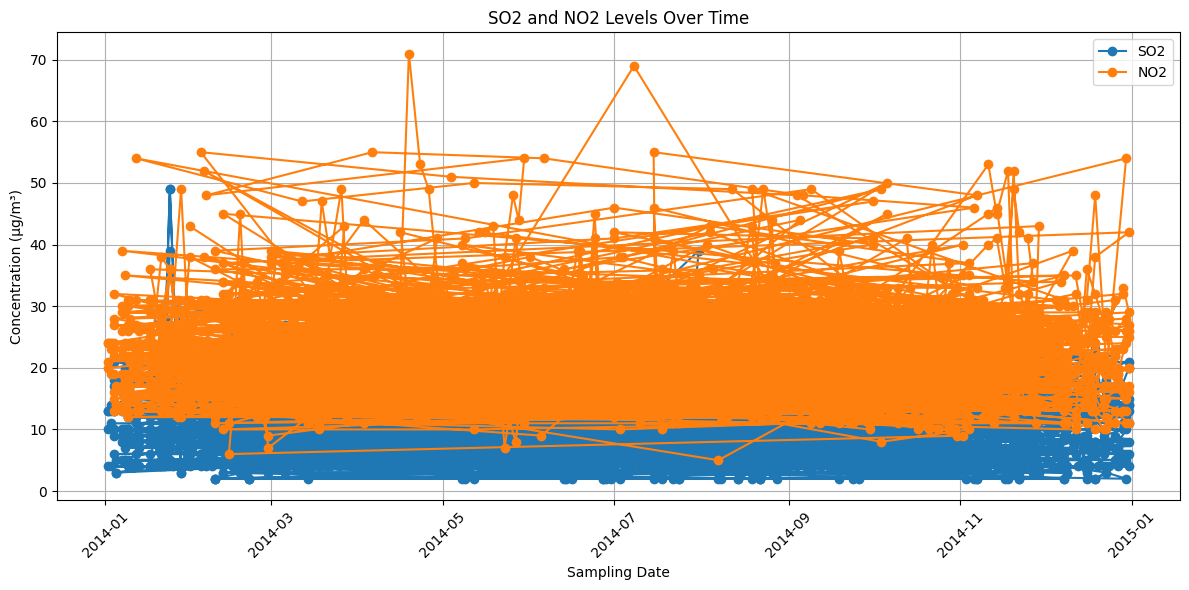

In [6]:
# Convert 'Sampling Date' to a datetime object for time series analysis
df['Sampling Date'] = pd.to_datetime(df['Sampling Date'], format='%d-%m-%y')

# Plot SO2 and NO2 levels over time
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2', marker='o')
plt.title('SO2 and NO2 Levels Over Time')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


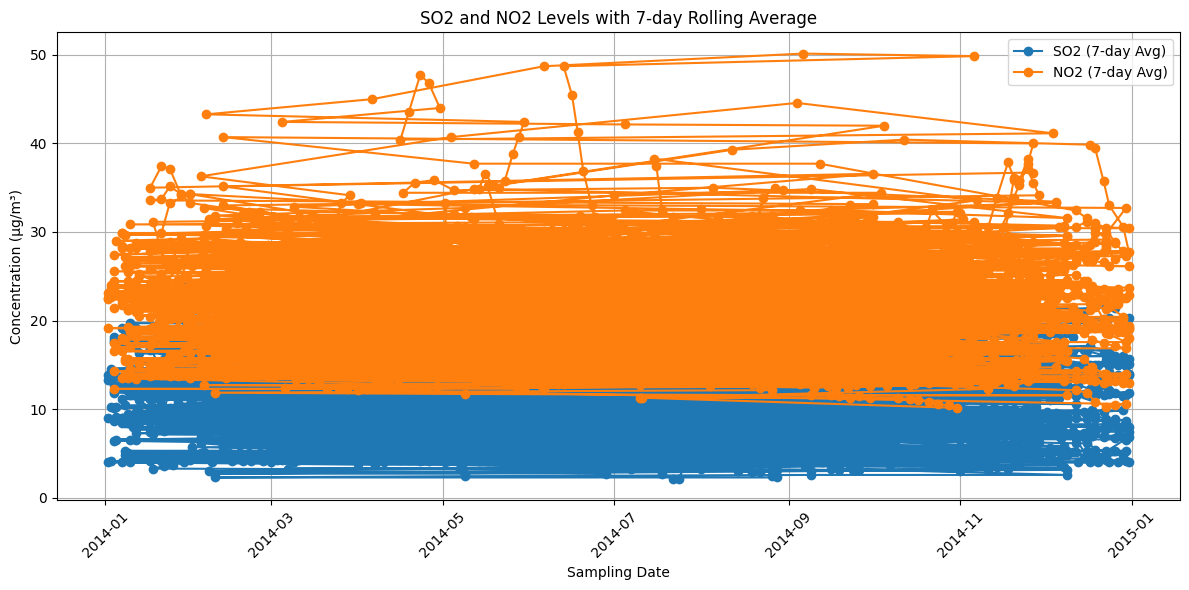

In [8]:
# Calculate the 7-day rolling average for SO2 and NO2
df['SO2_7day_avg'] = df['SO2'].rolling(window=7).mean()
df['NO2_7day_avg'] = df['NO2'].rolling(window=7).mean()

# Plot the 7-day rolling averages
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2_7day_avg'], label='SO2 (7-day Avg)', marker='o')
plt.plot(df['Sampling Date'], df['NO2_7day_avg'], label='NO2 (7-day Avg)', marker='o')
plt.title('SO2 and NO2 Levels with 7-day Rolling Average')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


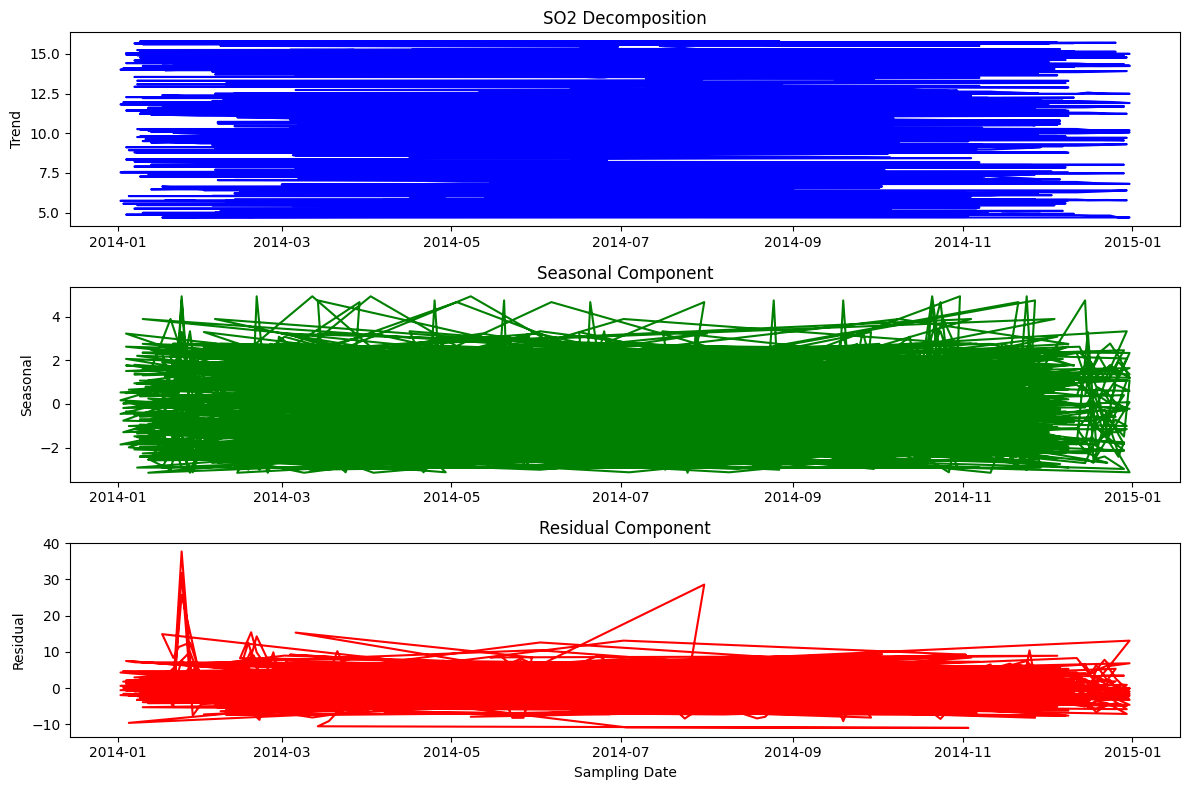

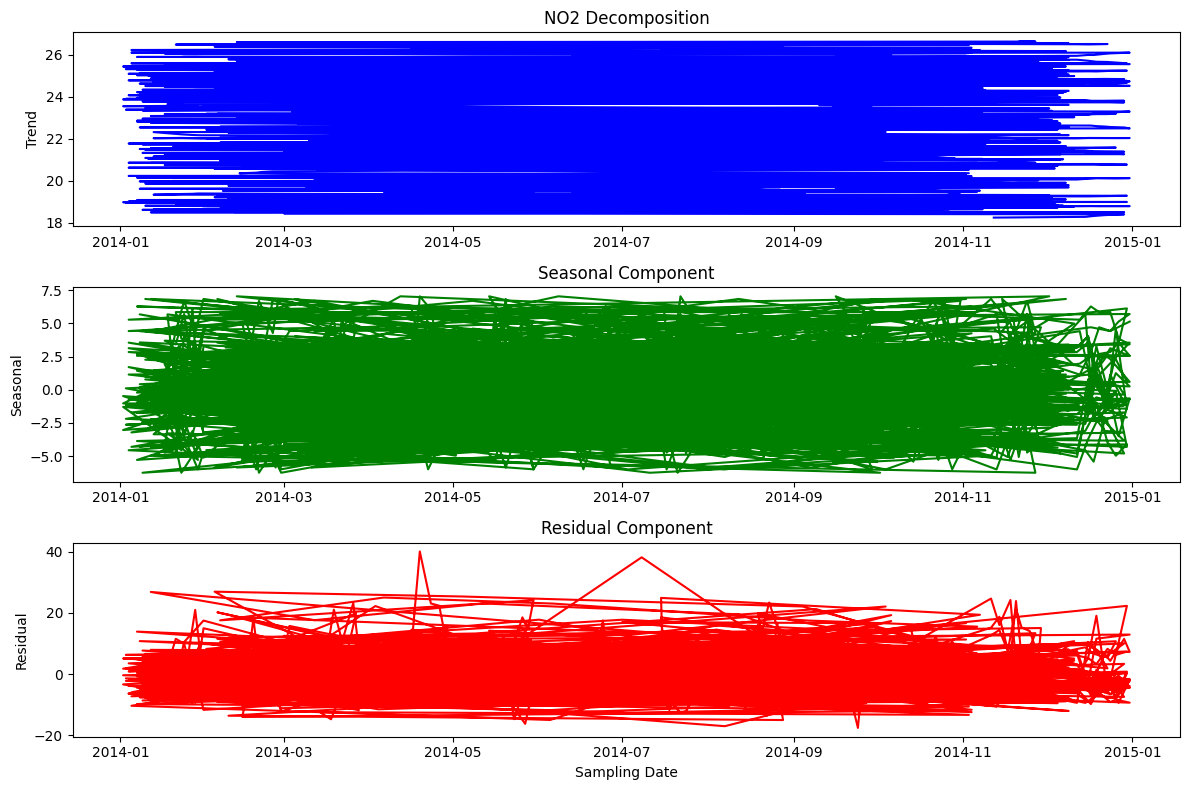

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition on SO2 and NO2 data
decomposition_SO2 = seasonal_decompose(df['SO2'], model='additive', period=365)
decomposition_NO2 = seasonal_decompose(df['NO2'], model='additive', period=365)

# Plot the decomposed components for SO2
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Sampling Date'], decomposition_SO2.trend, label='Trend', color='blue')
plt.title('SO2 Decomposition')
plt.ylabel('Trend')

plt.subplot(3, 1, 2)
plt.plot(df['Sampling Date'], decomposition_SO2.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.ylabel('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(df['Sampling Date'], decomposition_SO2.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Sampling Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

# Plot the decomposed components for NO2
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Sampling Date'], decomposition_NO2.trend, label='Trend', color='blue')
plt.title('NO2 Decomposition')
plt.ylabel('Trend')

plt.subplot(3, 1, 2)
plt.plot(df['Sampling Date'], decomposition_NO2.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.ylabel('Seasonal')

plt.subplot(3, 1, 3)
plt.plot(df['Sampling Date'], decomposition_NO2.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.xlabel('Sampling Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


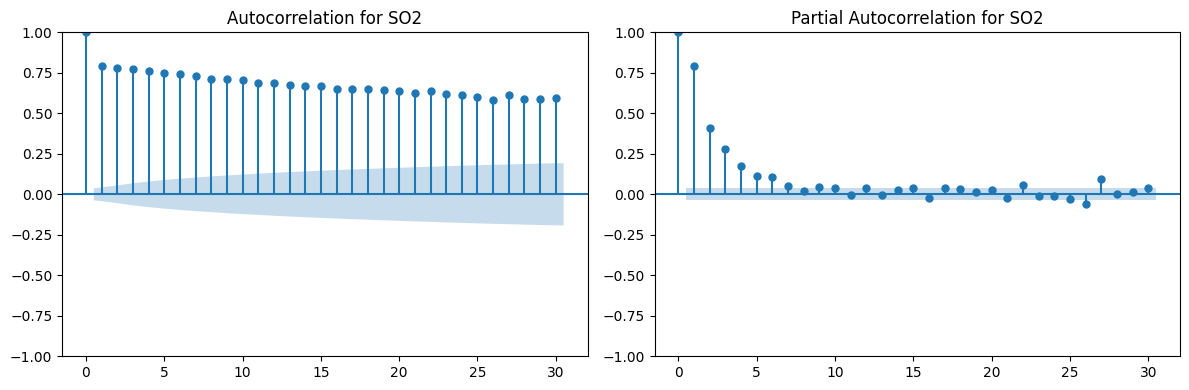

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation Plots for SO2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Autocorrelation for SO2')

plt.subplot(1, 2, 2)
plot_pacf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation for SO2')

plt.tight_layout()
plt.show()


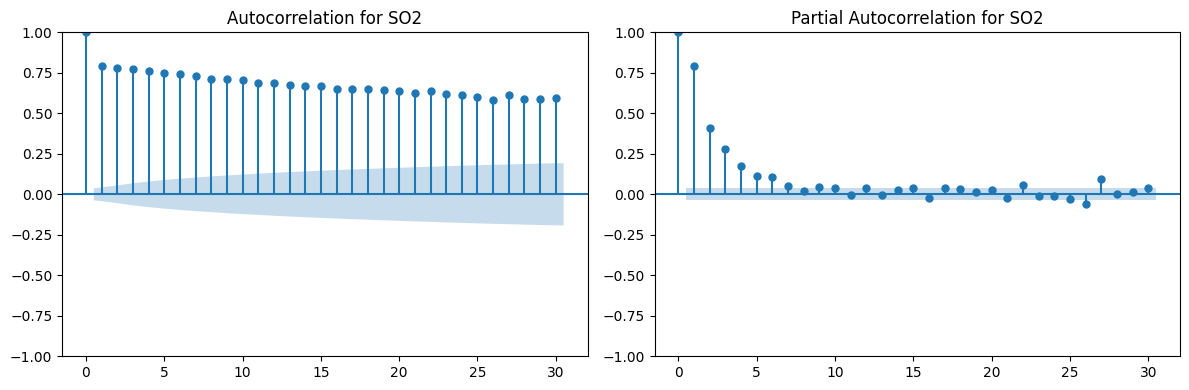

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation Plots for SO2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plot_acf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Autocorrelation for SO2')

plt.subplot(1, 2, 2)
plot_pacf(df['SO2'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation for SO2')

plt.tight_layout()
plt.show()


In [13]:
!pip install statsmodels


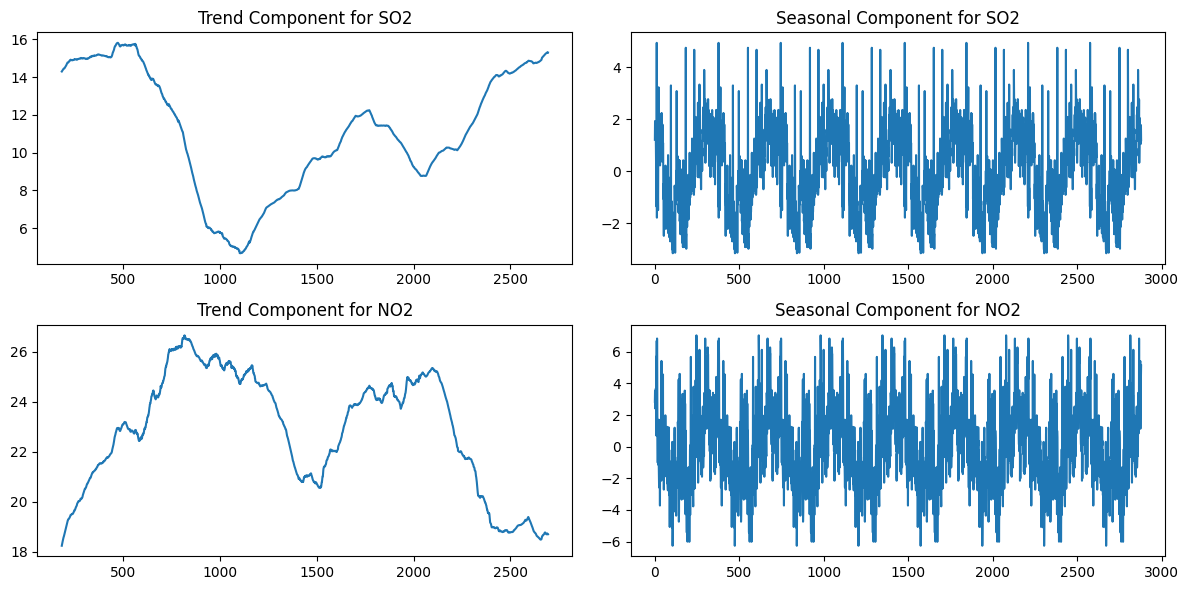

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on SO2 and NO2 data
decomposition_SO2 = seasonal_decompose(df['SO2'], model='additive', period=365)
decomposition_NO2 = seasonal_decompose(df['NO2'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(decomposition_SO2.trend, label='Trend')
plt.title('Trend Component for SO2')

plt.subplot(2, 2, 2)
plt.plot(decomposition_SO2.seasonal, label='Seasonal')
plt.title('Seasonal Component for SO2')

plt.subplot(2, 2, 3)
plt.plot(decomposition_NO2.trend, label='Trend')
plt.title('Trend Component for NO2')

plt.subplot(2, 2, 4)
plt.plot(decomposition_NO2.seasonal, label='Seasonal')
plt.title('Seasonal Component for NO2')

plt.tight_layout()
plt.show()


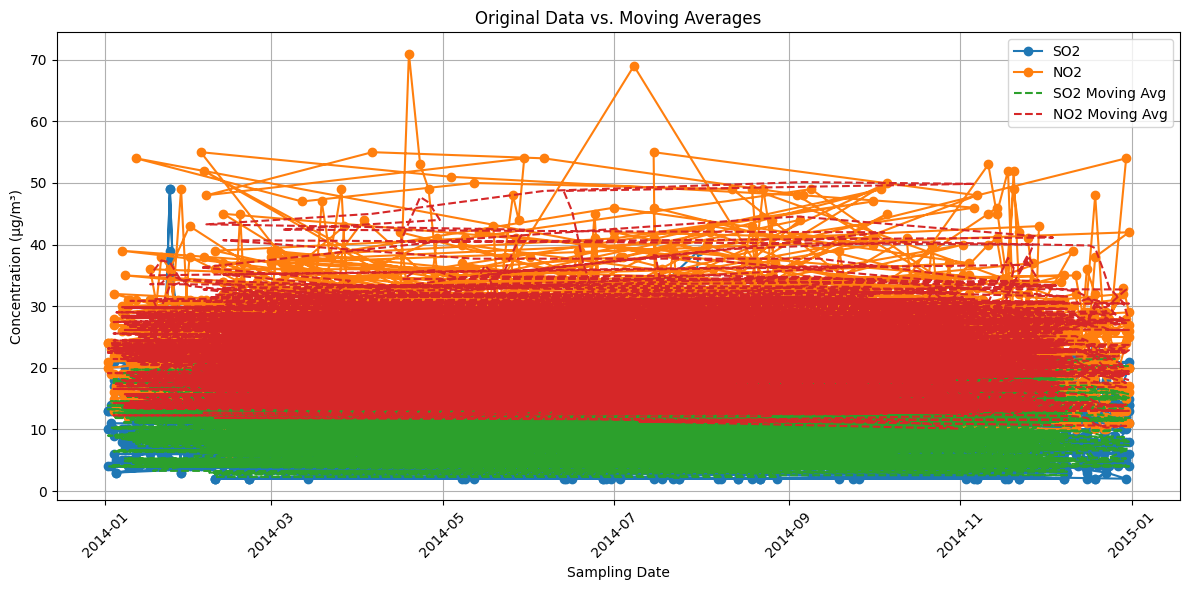

In [19]:
# Calculate moving averages for SO2 and NO2
window_size = 7  # Adjust the window size as needed
df['SO2_MA'] = df['SO2'].rolling(window=window_size).mean()
df['NO2_MA'] = df['NO2'].rolling(window=window_size).mean()

# Plot the original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Sampling Date'], df['SO2'], label='SO2', marker='o')
plt.plot(df['Sampling Date'], df['NO2'], label='NO2', marker='o')
plt.plot(df['Sampling Date'], df['SO2_MA'], label='SO2 Moving Avg', linestyle='--')
plt.plot(df['Sampling Date'], df['NO2_MA'], label='NO2 Moving Avg', linestyle='--')
plt.title('Original Data vs. Moving Averages')
plt.xlabel('Sampling Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import itertools
from statsmodels.tsa.arima_model import ARIMA

# Define a function for grid search
def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit(disp=0)
            aic = results.aic

            if aic < best_aic:
                best_aic = aic
                best_order = order

        except:
            continue

    return best_order, best_aic

# Define the ranges for p, d, and q values
p_values = range(5)
d_values = range(2)
q_values = range(5)

# Perform grid search
best_order, best_aic = grid_search_arima(df['SO2'], p_values, d_values, q_values)
print(f'Best ARIMA Order: {best_order} (AIC={best_aic})')


Best ARIMA Order: None (AIC=inf)
